In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import MiniBatchKMeans
import time

In [3]:
with open("C:/MLAssingment/data/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [6]:
with open("C:/MLAssingment/data/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [7]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [8]:
path = "C:/MLAssingment/data/kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=columns)
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [9]:
df.shape

(494021, 43)

In [10]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [11]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [12]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [14]:
print('Null values in the dataset are: ',len(df[df.isnull().any(1)]))

Null values in the dataset are:  0


In [15]:
duplicateRowsDF = df[df.duplicated()]

In [16]:
duplicateRowsDF.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
2500,0,tcp,http,SF,307,60990,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,normal
2864,0,tcp,http,SF,351,11485,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,normal
2977,0,tcp,http,SF,506,2419,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,normal
3003,0,tcp,http,SF,319,1374,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,normal
3130,0,tcp,http,SF,234,1212,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [18]:
df.drop_duplicates(subset=columns, keep='first', inplace=True)
df.shape

(145586, 43)

In [19]:
df.to_pickle('data.pkl')
df = pd.read_pickle('data.pkl')

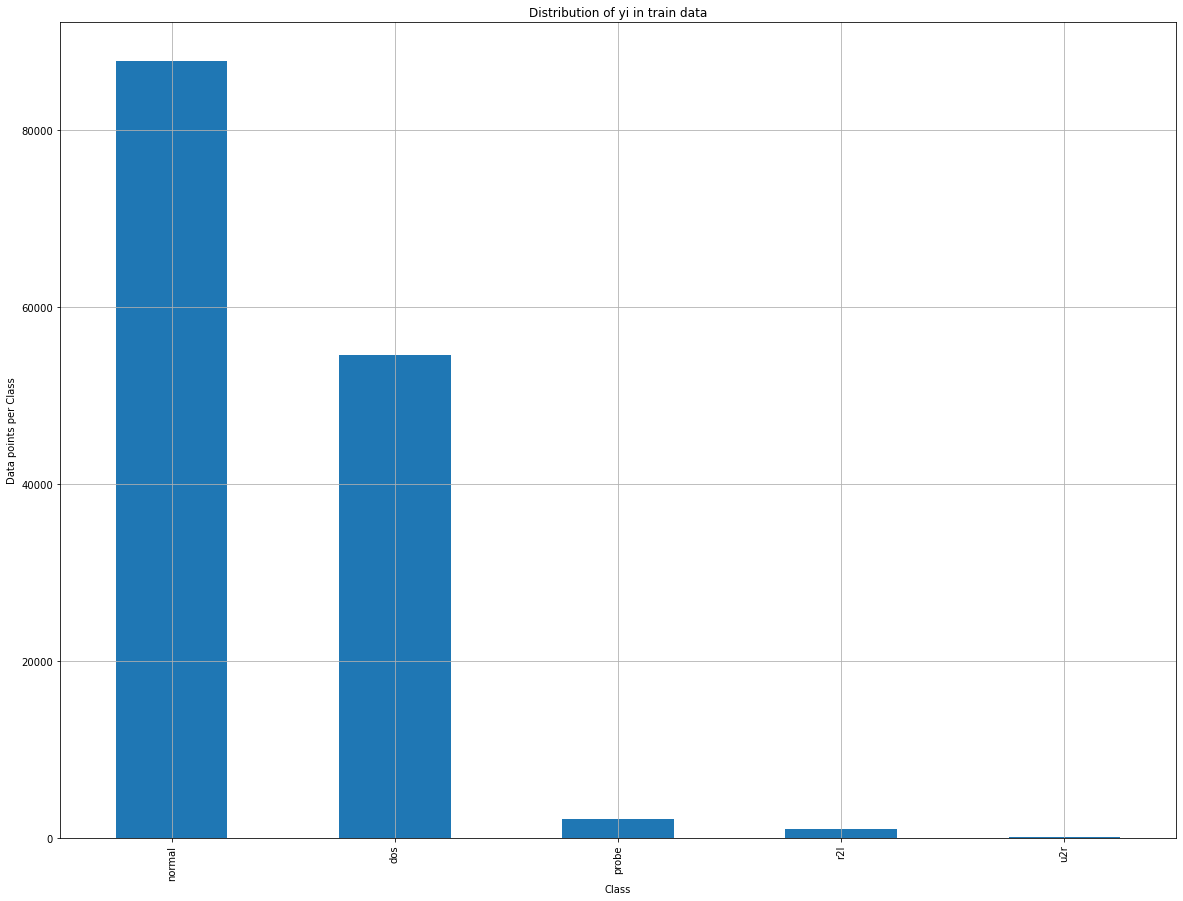

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 54572 ( 37.484 %)
Number of data points in class 3 : 2131 ( 1.464 %)
Number of data points in class 4 : 999 ( 0.686 %)
Number of data points in class 5 : 52 ( 0.036 %)


In [22]:
plt.figure(figsize=(20,15))
class_distribution = df['Attack Type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'u2r'),
  Text(2, 0, 'dos'),
  Text(3, 0, 'r2l'),
  Text(4, 0, 'probe')])

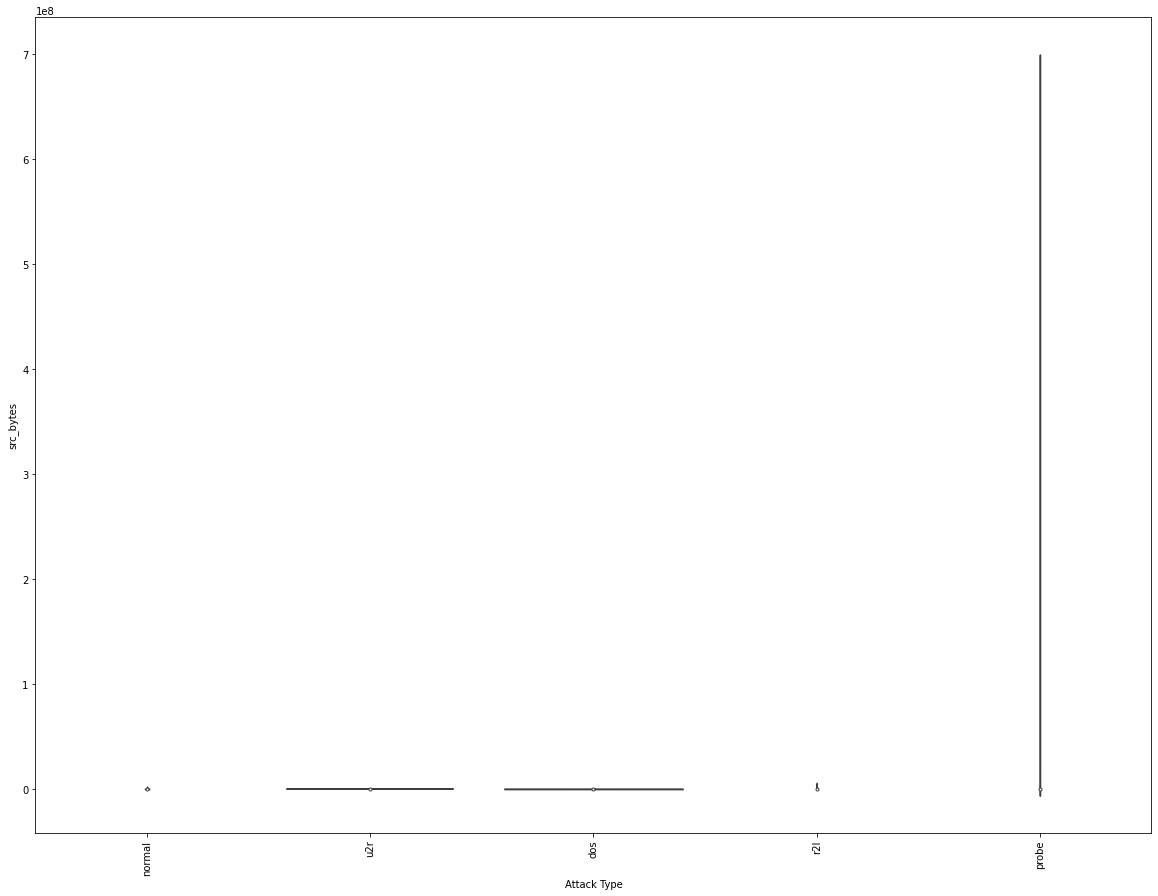

In [25]:
plt.figure(figsize=(20,15))
sns.violinplot(x="Attack Type", y="src_bytes", data=df)
plt.xticks(rotation=90)

In [28]:
def pairplot(df, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(df, hue=label, height=4, diag_kind='hist', vars=features,
            plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

In [44]:
from datetime import datetime

df1 = df.drop(['Attack Type','protocol_type','service','flag', 'target'], axis=1)
Y = df['Attack Type'].values

In [30]:
from sklearn.manifold import TSNE
import joblib

In [42]:
def tsne_func(data, label, no_components, perplexity_value, n_iter_value):
    '''
    This function applies TSNE on the original dataset with no_components, perplexity_value, n_iter_value as the TSNE 
    parameters and transforms the original dataset into TSNE transformed feature space with the tsne dataset containing 
    number of features equal to the value specified for no_components and also plots the scatter plot of the transformed 
    data points along with their class label 
    '''
    start = datetime.now()
    print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))
    tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
    tsne_df1 = tsne.fit_transform(data)
    print(tsne_df1.shape)
    tsne_df1 = np.vstack((tsne_df1.T, Y)).T
    tsne_data1 = pd.DataFrame(data=tsne_df1, columns=['feature1', 'feature2', 'Output'])
    sns.FacetGrid(tsne_data1, hue='Output', size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()
    print('Total time taken:',datetime.now()-start)
    plt.show()

TSNE with perplexity=100 and no. of iterations=500
(145586, 2)
Total time taken: 0:05:50.913255


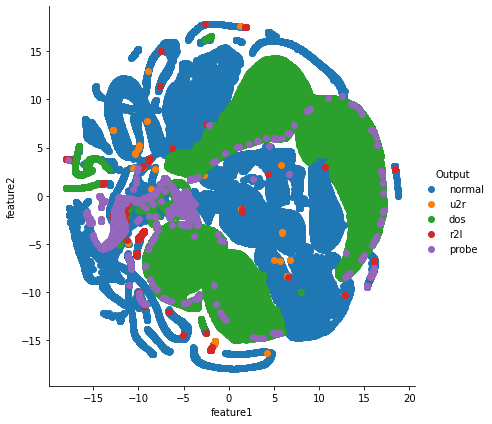

In [45]:
tsne_func(data=df1, label=Y, no_components=2, perplexity_value=100, n_iter_value=500)

In [38]:
df1.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [46]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [143]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    
    '''
    This function computes the performance scores on the train and test data.
    '''
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    results_tr['accuracy'] = accuracy_score(Y_train,y_tr_pred)
    
    
    print('Training Accuracy :')
    print( accuracy_score(Y_train,y_tr_pred))
    print('='*50)
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    print('Testing Accuracy :')
    print( accuracy_score(Y_test,y_test_pred))
    results_test['accuracy'] = accuracy_score(Y_test,y_test_pred)
    print('='*50)
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test

In [48]:
def print_grid_search_attributes(model):
    
    '''
    This function prints all the grid search attributes
    '''
    
    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [105]:
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr['target']=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(Y_pred)):
        if Y_tr['target']=='normal.' and Y_tr['target']=='normal.':
            tp += 1
        elif Y_tr['target']!='normal.' and Y_tr['target']=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives
    
    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr
    
    return results

In [50]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

In [51]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

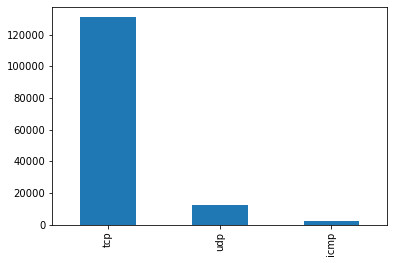

In [52]:
bar_graph('protocol_type')

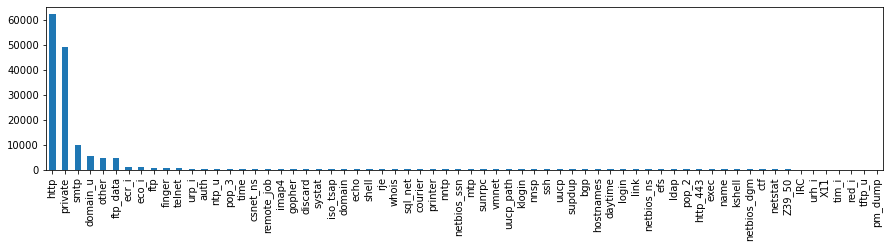

In [53]:
plt.figure(figsize=(15,3))
bar_graph('service')

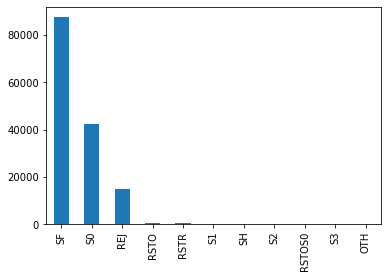

In [54]:
bar_graph('flag')

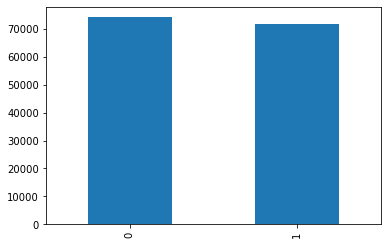

In [55]:
bar_graph('logged_in')

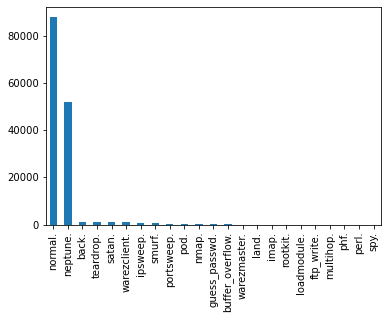

In [56]:
bar_graph('target')

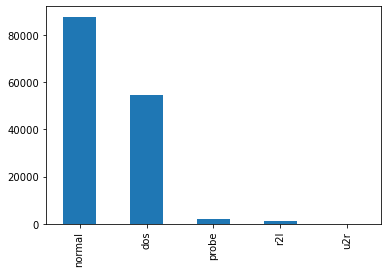

In [57]:
bar_graph('Attack Type')

In [58]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

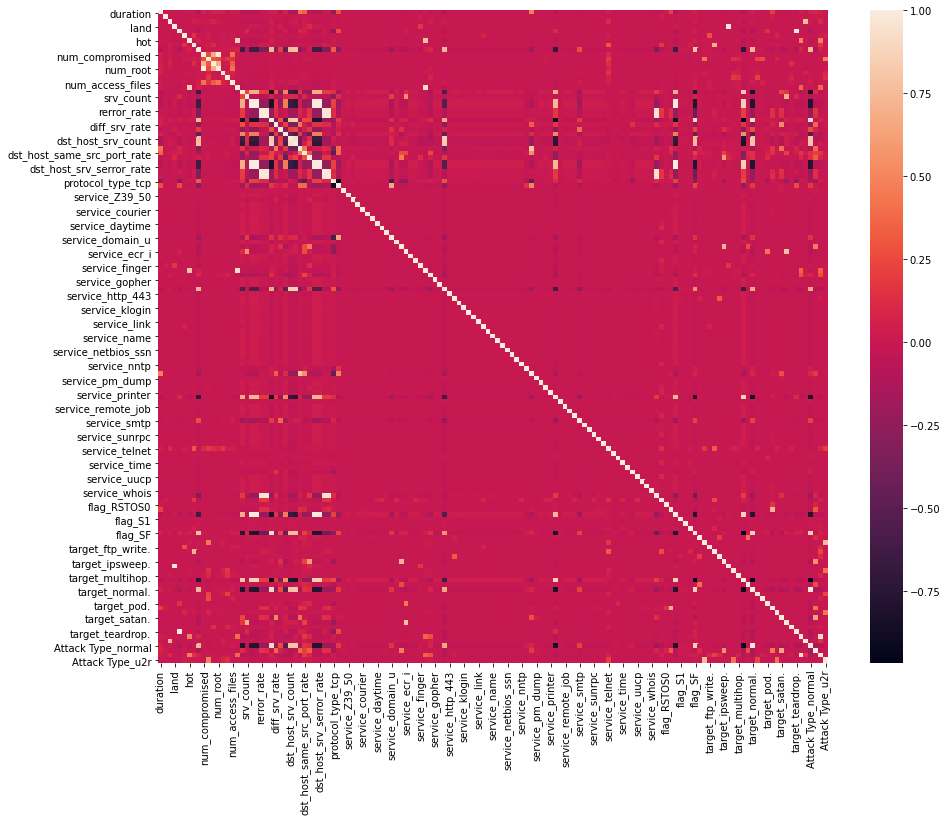

In [59]:
df = df.dropna(axis='columns')
df = df[[col for col in df if df[col].nunique() > 1]]
df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [60]:
df['num_root'].corr(df['num_compromised'])

0.9942146069064681

In [61]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9963627548286997

In [62]:
df['srv_count'].corr(df['count'])

0.2293236603765414

In [63]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.991316952571299

In [64]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9365191648908988

In [65]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9958977350060596

In [66]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.8583961573374818

In [67]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.7972149497260566

In [68]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.09507134180392145

In [69]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9968427313716647

In [70]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9951224321913412

In [71]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9951521034735545

In [72]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9983509795965033

In [73]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9755139232818131

In [74]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9673749564724704

In [75]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9726142096063977

In [76]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9751047687986119

In [77]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [78]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [79]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
df_std = df_numeric.std()  # Compute standard deviation
df_std = df_std.sort_values(ascending=True)  # Sort the standard deviations
df_std

urgent                         1.015038e-02
land                           1.171998e-02
su_attempted                   1.435444e-02
root_shell                     1.943305e-02
num_shells                     2.029761e-02
num_failed_logins              2.858542e-02
dst_host_srv_diff_host_rate    6.040967e-02
num_access_files               6.709079e-02
is_guest_login                 6.843257e-02
diff_srv_rate                  1.203955e-01
dst_host_diff_srv_rate         1.470208e-01
num_file_creations             1.775812e-01
wrong_fragment                 2.393680e-01
dst_host_same_src_port_rate    2.411234e-01
srv_diff_host_rate             2.419522e-01
rerror_rate                    3.089614e-01
same_srv_rate                  4.467948e-01
serror_rate                    4.529027e-01
logged_in                      4.999293e-01
hot                            1.426798e+00
num_compromised                3.311373e+00
srv_count                      3.073613e+01
dst_host_count                 9

In [80]:
df['protocol_type'].value_counts()

tcp     130913
udp      12267
icmp      2406
Name: protocol_type, dtype: int64

In [81]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [82]:
df['flag'].value_counts()

SF        87459
S0        42278
REJ       14712
RSTO        569
RSTR        425
S1           57
SH           34
S2           24
RSTOS0       11
S3           10
OTH           7
Name: flag, dtype: int64

In [83]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [84]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [85]:
df.drop('service',axis = 1,inplace= True)

In [86]:
df.shape

(145586, 32)

In [87]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [88]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [90]:
# Splitting dataset into training and testing sets
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(145586, 31)
(97542, 30) (48044, 30)
(97542, 1) (48044, 1)


In [96]:
!pip install joblib
from sklearn.naive_bayes import GaussianNB
import joblib
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [97]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.4s finished


Completed
Time taken: 0:00:05.224370
Training Accuracy :
0.9531791433433803
Prediction on test data:
Completed
Time taken: 0:00:00.056004
Performance metrics:
Confusion Matrix is:


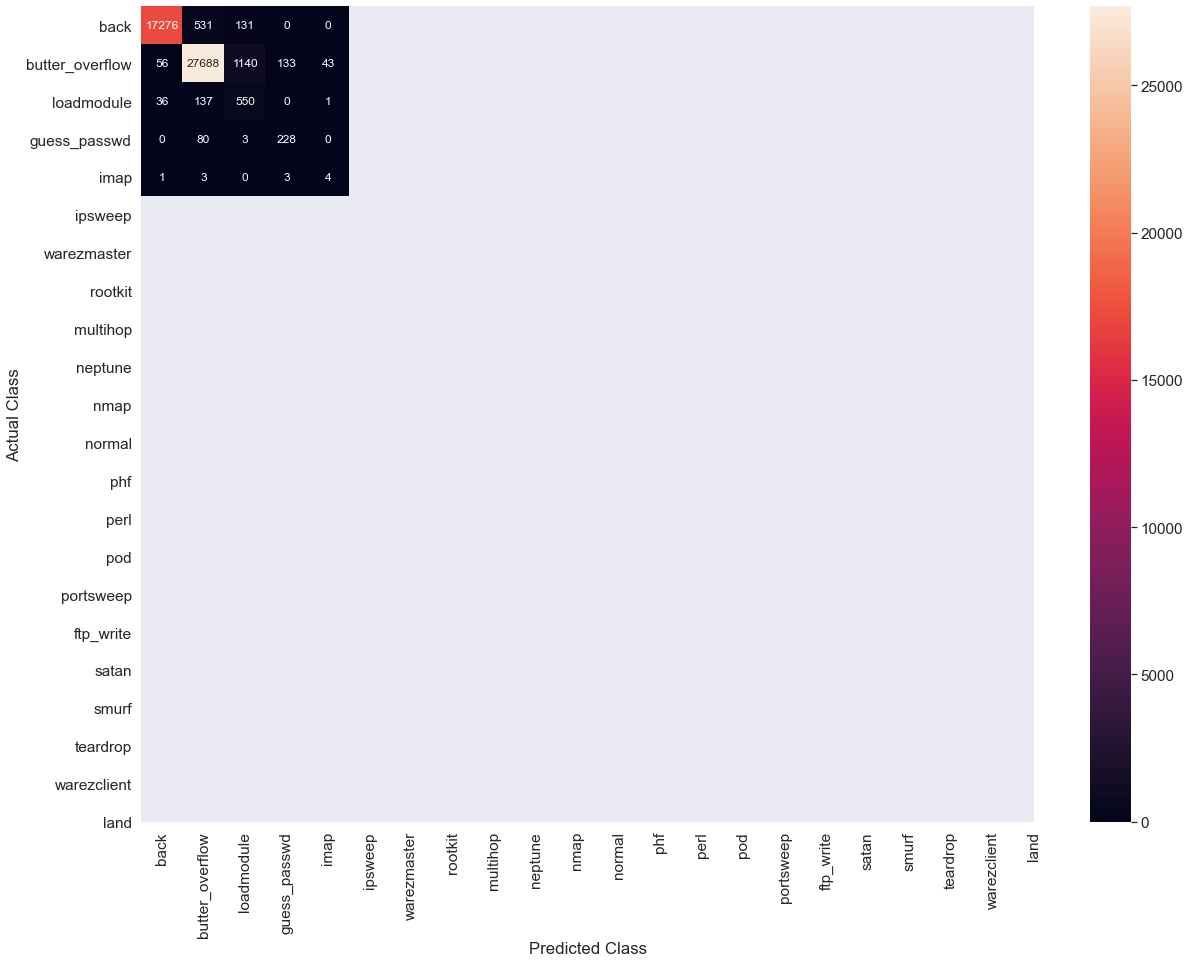

Precision score is:
0.9688740454339717
Recall score is:
0.9521688452252102
F1-score is:
0.9588210820270866
Testing Accuracy :
0.9521688452252102


In [145]:
nb_grid_results_tr, nb_grid_results_test = model(nb_grid, X_train, Y_train, X_test, Y_test)

In [100]:
print_grid_search_attributes(nb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	GaussianNB(var_smoothing=0.1)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'var_smoothing': 0.1}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9533636773143603



In [101]:
joblib.dump(nb_grid.best_estimator_, 'nb_gs.pkl')

['nb_gs.pkl']

In [108]:
start_time = time.time()
nb.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [109]:
print("Training time: ",end_time-start_time)

Training time:  0.14147710800170898


In [111]:
start_time = time.time()
Y_test_pred1 = nb.predict(X_test)
end_time = time.time()

In [112]:
print("Testing time: ",end_time-start_time)

Testing time:  0.0625452995300293


In [113]:
print("Train score is:", nb.score(X_train, Y_train))
print("Test score is:",nb.score(X_test,Y_test))

Train score is: 0.8115478460560579
Test score is: 0.8080093247856132


In [146]:
nb_grid_results_test

{'precision': 0.9688740454339717,
 'recall': 0.9521688452252102,
 'f1_score': 0.9588210820270866,
 'accuracy': 0.9521688452252102,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [149]:
nb_grid_results_tr

{'precision': 0.9695858842594456,
 'recall': 0.9531791433433803,
 'f1_score': 0.9596503778387483,
 'accuracy': 0.9531791433433803}

In [150]:
hyperparameter = {'alpha':[10**x for x in range(-8,3)], 'penalty':['l1', 'l2']}

from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge')
svm_grid = GridSearchCV(svm, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   25.6s finished


Completed
Time taken: 0:00:26.975851
Training Accuracy :
0.9926288163047713
Prediction on test data:
Completed
Time taken: 0:00:00.010514
Performance metrics:
Confusion Matrix is:


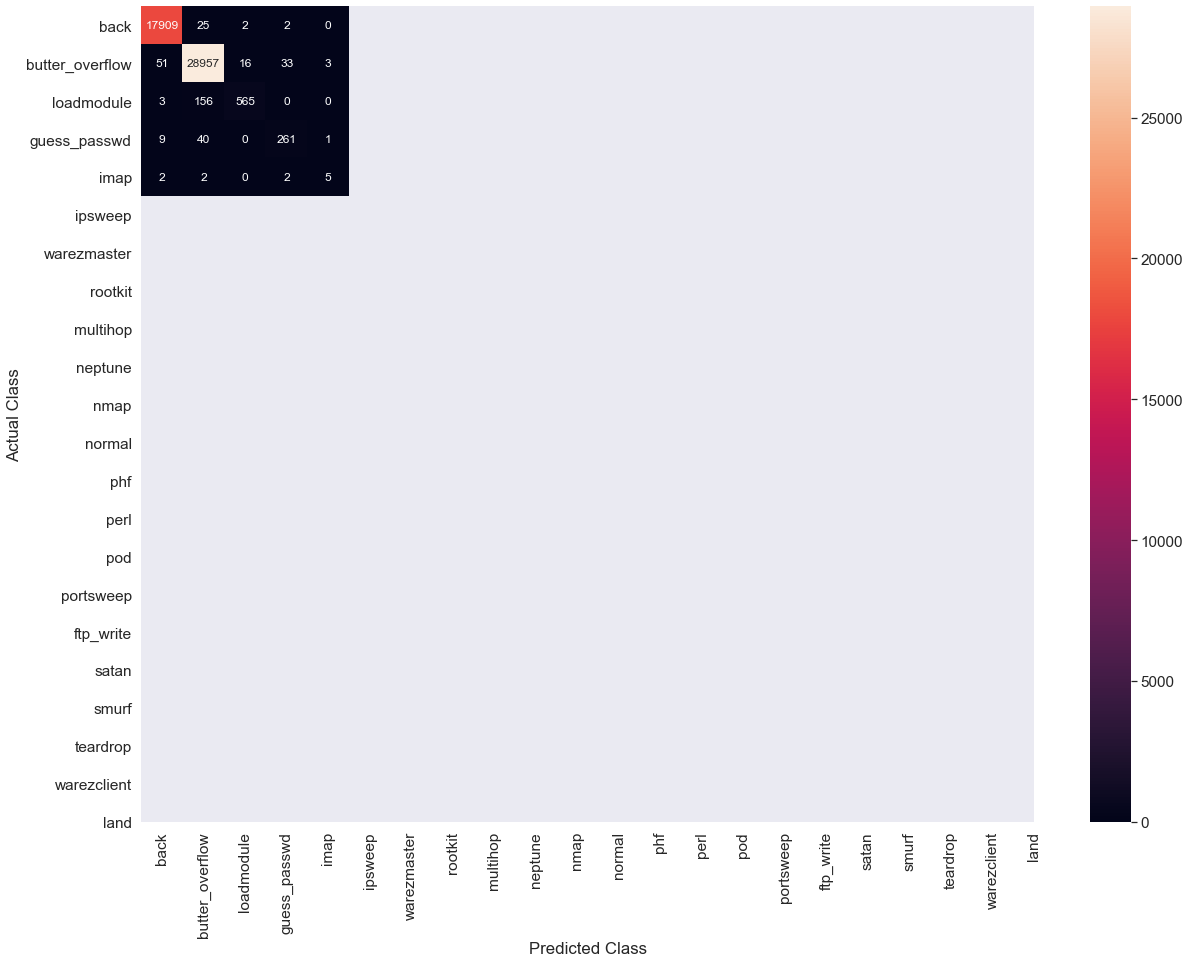

Precision score is:
0.9926565424801481
Recall score is:
0.9927774540004995
F1-score is:
0.9925569677485606
Testing Accuracy :
0.9927774540004995


In [151]:
svm_grid_results_tr, svm_grid_results_test = model(svm_grid, X_train, Y_train, X_test, Y_test)

In [120]:
print_grid_search_attributes(svm_grid)

---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=1e-05, penalty='l1')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'alpha': 1e-05, 'penalty': 'l1'}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9921162126052703



In [152]:
svm_grid_results_tr

{'precision': 0.9924969415858482,
 'recall': 0.9926288163047713,
 'f1_score': 0.992412521154201,
 'accuracy': 0.9926288163047713}

In [153]:
svm_grid_results_test

{'precision': 0.9926565424801481,
 'recall': 0.9927774540004995,
 'f1_score': 0.9925569677485606,
 'accuracy': 0.9927774540004995,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [135]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.6s finished


Completed
Time taken: 0:00:05.486623
Training Accuracy :
0.9996924401796149
Prediction on test data:
Completed
Time taken: 0:00:00.006290
Performance metrics:
Confusion Matrix is:


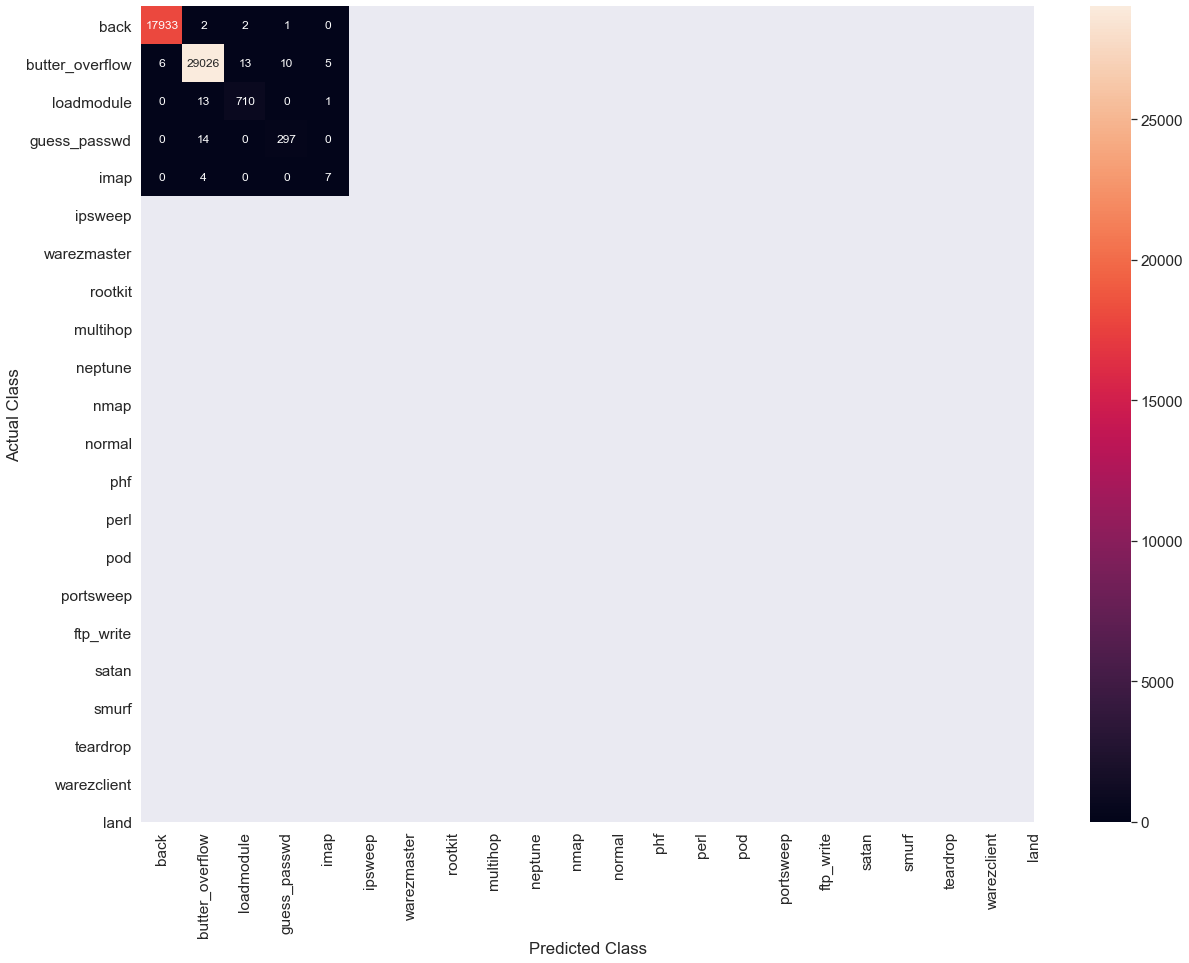

Precision score is:
0.9985395850172192
Recall score is:
0.9985221879943386
F1-score is:
0.9985297991191979
Testing Accuracy :
0.9985221879943386


In [154]:
decision_tree_grid_results_tr, decision_tree_grid_results_test = model(decision_tree_grid, X_train, Y_train, X_test, Y_test)

In [137]:
decision_tree_grid_results_tr

{'precision': 0.9997048905194182,
 'recall': 0.9996924401796149,
 'f1_score': 0.999695724470681,
 'accuracy': 0.9986054450087419}

In [155]:
decision_tree_grid_results_test

{'precision': 0.9985395850172192,
 'recall': 0.9985221879943386,
 'f1_score': 0.9985297991191979,
 'accuracy': 0.9985221879943386,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}

In [156]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


Completed
Time taken: 0:06:50.347492
Training Accuracy :
0.9997231961616534
Prediction on test data:
Completed
Time taken: 0:00:01.836244
Performance metrics:
Confusion Matrix is:


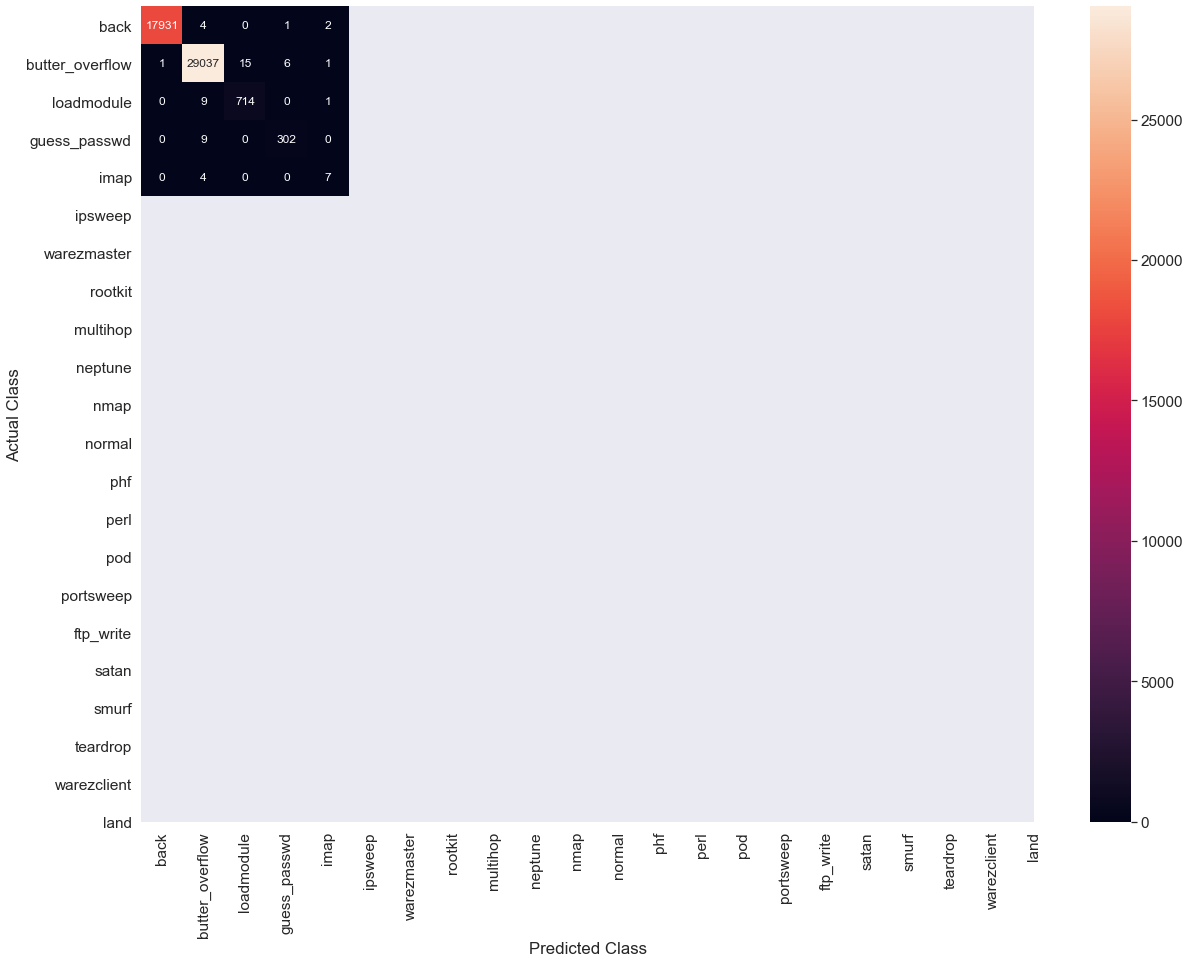

Precision score is:
0.9988980918000686
Recall score is:
0.9988968445591541
F1-score is:
0.998897215125262
Testing Accuracy :
0.9988968445591541


In [157]:
rf_grid_results_tr, rf_grid_results_test = model(rf_grid, X_train, Y_train, X_test, Y_test)

In [158]:
decision_tree_grid_results_tr

{'precision': 0.9997048905194182,
 'recall': 0.9996924401796149,
 'f1_score': 0.999695724470681,
 'accuracy': 0.9996924401796149}

In [159]:
decision_tree_grid_results_test

{'precision': 0.9985395850172192,
 'recall': 0.9985221879943386,
 'f1_score': 0.9985297991191979,
 'accuracy': 0.9985221879943386,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>}